 # OBJECTIVE :

To develop a command-linr based Expense tracker for data manipulation and basic analysis

In [1]:
# Libraries used 
# for data preparation and analysis
import pandas as pd

# for deling with neumeric variables 
import numpy as np

# for creating plots
import matplotlib.pyplot as plt

In [3]:
# import the data 
df = pd.read_csv(r"D:\Data Science\cybrox solutions project\expenses.csv")

In [5]:
# to get the first 5 values
df.head()

,Date,Category,Amount,Description
0,6/10/2025,Food,150,Pizza at Dominos
1,6/11/2025,Transport,50,Rickshaw fare
2,6/12/2025,Rent,5000,June Rent
3,6/12/2025,Utilities,200,Electricity Bill


In [7]:
# to know the different columns
df.columns

Index(['Date', 'Category', 'Amount', 'Description'], dtype='object')

In [9]:
# to know the datatype
df.dtypes

Date           object
Category       object
Amount          int64
Description    object
dtype: object

Here we could see the Date datatype is object so we have to convert its datatype back to date

In [44]:
df['Date'] = pd.to_datetime(df['Date'])

In [46]:
# Now the data type of date has been changed
df.dtypes

Date           datetime64[ns]
Category               object
Amount                  int64
Description            object
dtype: object

In [48]:
# checking the dimension of data, shows the number of rows and columns
df.shape

(4, 4)

In [50]:
# to see the min max count
df.describe()

,Date,Amount
count,4,4.000000
mean,2025-06-11 06:00:00,1350.000000
min,2025-06-10 00:00:00,50.000000
25%,2025-06-10 18:00:00,125.000000
50%,2025-06-11 12:00:00,175.000000
75%,2025-06-12 00:00:00,1400.000000
max,2025-06-12 00:00:00,5000.000000
std,NaN,2434.132289


In [20]:
# to check for missing values 
df.isnull().sum()

Date           0
Category       0
Amount         0
Description    0
dtype: int64

# 1. Total amount spend overall.

In [23]:
Total_amt_spent = df['Amount'].sum()
print(Total_amt_spent)

5400


# . highest & lowest Expense

In [56]:
# highest expense
highest_expense = df.loc[df['Amount'].idxmax()]
print("\nHighest Expense:")
print(highest_expense.to_frame().T)


Highest Expense:
                  Date Category Amount Description
2  2025-06-12 00:00:00     Rent   5000   June Rent


In [54]:
# lowest expense
lowest_expense = df.loc[df['Amount'].idxmin()]
print("\nLowest Expense:")
print(lowest_expense.to_frame().T)


Lowest Expense:
                  Date   Category Amount    Description
1  2025-06-11 00:00:00  Transport     50  Rickshaw fare


# 2.Category-Wise analysis

Group expenses by Category and show:

In [32]:
# Total amount spent per category
total_amt_per_cate = df.groupby('Category')['Amount'].sum()
print(total_amt_per_cate)

Category
Food          150
Rent         5000
Transport      50
Utilities     200
Name: Amount, dtype: int64


In [34]:
# count of transactions per category
count_of_tran_cate = df.groupby('Category')['Amount'].count()
print(count_of_tran_cate)

Category
Food         1
Rent         1
Transport    1
Utilities    1
Name: Amount, dtype: int64


In [36]:
# percentage of total spent in each category
category_totals = df.groupby('Category')['Amount'].sum()

# Overall total
total_spent = category_totals.sum()

# percentage of total
category_percent = (category_totals/total_spent * 100).round(2)
print(category_percent)

Category
Food          2.78
Rent         92.59
Transport     0.93
Utilities     3.70
Name: Amount, dtype: float64


# Visual

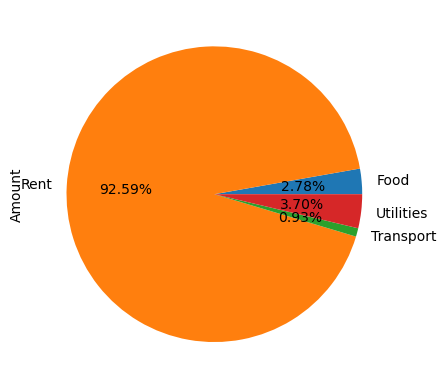

In [40]:
# pie chart to show % breakdown of expense by category 
df.groupby('Category')['Amount'].sum().plot(kind = 'pie',autopct='%0.2f%%')
plt.show()

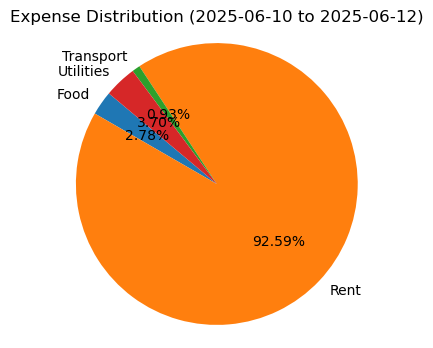

In [52]:
# to filter expenses by month or date range
start_date = '2025-06-10'
end_date = '2025-06-12'
filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Group and summarize
category_totals = filtered_df.groupby('Category')['Amount'].sum()

plt.figure(figsize=(4, 4))
plt.pie(category_totals, labels=category_totals.index, autopct='%1.2f%%', startangle=140)
plt.title(f'Expense Distribution ({start_date} to {end_date})')
plt.axis('equal')
plt.show()

In [68]:
from datetime import datetime
import os

In [70]:
# Define the CSV file path
csv_file = "expenses.csv"

# Accept user input
date_input = input("Enter date (YYYY-MM-DD), leave blank for today: ")
category = input("Enter expense category: ")
amount = float(input("Enter amount: "))
description = input("enter the details")

# Use today's date if no input
date = pd.to_datetime(date_input) if date_input else pd.to_datetime("today")

# Create new entry as a DataFrame
new_entry = pd.DataFrame([{"Category": category, "Amount": amount, "Date": date, "Description": description}])

# Check if file exists
file_exists = os.path.isfile(csv_file)

# Append without writing header again if file exists
new_entry.to_csv(r"D:\Data Science\cybrox solutions project\summary_report.csv", mode='a', index=False, header=not file_exists)

print("\n✅ Expense added to the bottom of the CSV file successfully!")

Enter date (YYYY-MM-DD), leave blank for today:  2025-06-14
Enter expense category:  bike
Enter amount:  120000
enter the details Vehicle pulsar


PermissionError: [Errno 13] Permission denied: 'D:\\Data Science\\cybrox solutions project\\summary_report.csv'